In [ ]:
# 데이터 확인
import csv

with open('data-files/subway-data.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    for idx, row in enumerate(reader):
        print(row)
        if idx == 5:
            break;

In [13]:
my_f = lambda x, y: x + y
#def my_f(x, y):
#    return x + y
my_f(10, 20)

30

In [ ]:
# map 함수 사용 연습

import csv

with open('data-files/subway-data.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    for idx, row in enumerate(reader):        
        # print(row[4:])
        # changed = map(int, row[4:-1]) # map(변환함수, 데이터)
        # changed = map(lambda x: int(x.replace(',', '')), 
        #               row[4:-1])
        # changed = [ int(x.replace(',', '') for x in row[4:-1] ]
        # print(list(changed))
        
        row[4:-1] = map(lambda x: int(x.replace(',', '')), 
                        row[4:-1])
        print(len(row[4:-1]))
        print(row[4:-1])
        if idx == 5:
            break;

In [83]:
# 역 별 7시 승차인원 합계
import csv

with open('data-files/subway-data.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_station = {}
    
    for row in reader:
        hour = 23
        idx = (hour - 4) * 2 + 4 # 승차
        # idx = (hour - 4) * 2 + 5 # 하차
        row[4:-1] = map(lambda x: int(x.replace(',', '')), 
                        row[4:-1])
        cnt = sum(row[idx : idx + 2 * 2 : 2])
        if row[3] in cnt_by_station:
            prev_data = cnt_by_station[row[3]]
            cnt_by_station[row[3]] = prev_data + cnt
        else:
            cnt_by_station[row[3]] = cnt
            
sorted_cnt_by_station = sorted(cnt_by_station.items(), \
                               key=lambda kv : kv[1], \
                               reverse=True)


In [84]:
sorted_cnt_by_station[:2]

[('강남', 61556), ('홍대입구', 57681)]

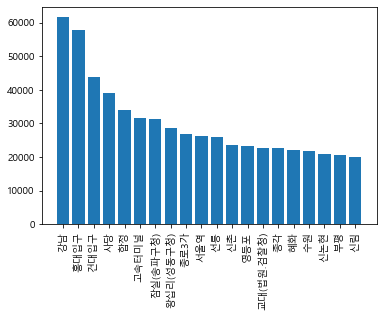

In [85]:
import matplotlib.pyplot as plt

cnt_list = list(dict(sorted_cnt_by_station).values())
stations = list(dict(sorted_cnt_by_station).keys())
# plt.bar(range(len(cnt_list)), cnt_list, width=3)
# plt.plot(cnt_list)
plt.rc('font', family='Malgun Gothic')
plt.bar(range(20), cnt_list[:20])
plt.xticks(range(20), stations[:20], rotation=90)
plt.show()

In [86]:
def add_list_by_element(list1, list2):
    # True일 때 사용할 값1 if 조건식 else False일 때 사용할 값2
    l, s = (list1, list2) if len(list1) >= len(list2) \
                          else (list2, list1)

    result = l.copy()
    for idx, e in enumerate(s):
            result[idx] = s[idx] + l[idx]
            
    return result

In [110]:
# 역별/시간대별 승객수 
import csv

with open('data-files/subway-data.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_station = {}
    
    for row in reader:
        hour = 4
        idx = (hour - 4) * 2 + 4 # 승차
        # idx = (hour - 4) * 2 + 5 # 하차
        row[4:-1] = map(lambda x: int(x.replace(',', '')), 
                        row[4:-1])
        cnts = []
        for h in range(24):
            cnt = row[idx + h * 2] + row[idx + h * 2 + 1]
            cnts.append(cnt)
            
        if row[3] in cnt_by_station:
            prev_data = cnt_by_station[row[3]]
            cnt_by_station[row[3]] = \
                add_list_by_element(prev_data, cnts)
        else:
            cnt_by_station[row[3]] = cnts
            

# print(len(list(cnt_by_station.items())[0][1]))
# list(cnt_by_station.items())[:2]

top_one_by_hour = []
for idx in range(24):
    sorted_by_h = sorted(cnt_by_station.items(), 
                         key=lambda kv : kv[1][idx],
                         reverse=True)
    # top_one_by_hour.append(sorted_by_h[0])
    top_one_by_hour.append(\
        (sorted_by_h[0][0], sorted_by_h[0][1][idx]))

top_one_by_hour

[('구로', 10144),
 ('대림(구로구청)', 47618),
 ('신림', 91277),
 ('여의도', 230500),
 ('가산디지털단지', 504381),
 ('강남', 349390),
 ('고속터미널', 190788),
 ('고속터미널', 211399),
 ('고속터미널', 220433),
 ('고속터미널', 238698),
 ('고속터미널', 247239),
 ('고속터미널', 268926),
 ('고속터미널', 283936),
 ('강남', 334172),
 ('강남', 493832),
 ('강남', 318571),
 ('잠실(송파구청)', 240739),
 ('강남', 220906),
 ('강남', 212904),
 ('신림', 102725),
 ('신도림', 15097),
 ('인천', 7),
 ('신당', 2),
 ('서울역', 0)]

In [114]:
# 시간대별 승차/하차 승객수 
import csv

with open('data-files/subway-data.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_hour = {}
    
    for row in reader:
        hour = 4
        idx = (hour - 4) * 2 + 4 # 승차        
        row[4:-1] = map(lambda x: int(x.replace(',', '')), 
                        row[4:-1])
        cnts = []
        for h in range(24):            
            cnt = [ row[idx + h * 2], row[idx + h * 2 + 1] ]
            if h in cnt_by_hour:
                prev_data = cnt_by_hour[h]
                new_data = add_list_by_element(prev_data, cnt)
                cnt_by_hour[h] = new_data
            else:
                cnt_by_hour[h] = cnt

# print(cnt_by_hour)

sorted_cnt_by_hour = sorted(cnt_by_hour.items(),
                            key=lambda kv: kv[1][0] + kv[1][1],
                            reverse=True)
sorted_cnt_by_hour


[(14, [17965005, 16489387]),
 (4, [15257337, 18094697]),
 (13, [13278794, 11257355]),
 (15, [9850784, 13620575]),
 (5, [9383341, 11885809]),
 (3, [13222919, 7884852]),
 (12, [9970996, 8981738]),
 (11, [8689880, 8214553]),
 (9, [7937772, 7888863]),
 (10, [7960799, 7840074]),
 (16, [7539696, 8179318]),
 (8, [7508286, 7193539]),
 (6, [6867525, 7413014]),
 (17, [6865561, 7076573]),
 (7, [6884571, 6869507]),
 (18, [5626715, 6371986]),
 (2, [5313295, 3645705]),
 (19, [2090385, 4255486]),
 (1, [2735202, 722627]),
 (20, [36842, 644821]),
 (0, [114714, 1414]),
 (21, [22, 62]),
 (22, [9, 15]),
 (23, [0, 0])]

'aaaaaaaaaa'

In [13]:
# 데이터 확인
import csv

with open('data-files/subway-data.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    with open('data-files/subway-data-modified.csv', 'w', encoding="utf-8") as f2:        
        for idx, row in enumerate(reader):
            row2 = map(lambda x: x.replace(",", ""), row)
            f2.write(",".join(list(row2)))
            f2.write('\n')
            
print("end of file")

end of file


In [17]:
import numpy as np

ar = np.genfromtxt('data-files/subway-data-modified.csv', delimiter=',', encoding="utf-8", dtype='U')


In [18]:
print(ar)

[['2020-05' '1호선' '0150' ... '0' '0' '2020-06-03 11:49:09']
 ['2020-05' '1호선' '0151' ... '0' '0' '2020-06-03 11:49:09']
 ['2020-05' '1호선' '0152' ... '0' '0' '2020-06-03 11:49:09']
 ...
 ['2020-05' '우이신설선' '4711' ... '0' '0' '2020-06-03 11:49:09']
 ['2020-05' '우이신설선' '4712' ... '0' '0' '2020-06-03 11:49:09']
 ['2020-05' '우이신설선' '4713' ... '0' '0' '2020-06-03 11:49:09']]


In [9]:
with open('data-files/subway-data-modified.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    
    for idx, row in enumerate(reader):
        print(row)
        if idx == 5:
            break;

['2020-05', '1호선', '0150', '서울역', '813', '16', '8478', '5920', '10736', '37191', '29922', '80358', '53921', '170533', '39251', '114126', '38103', '55958', '46762', '47869', '55232', '49303', '57055', '51283', '48828', '49860', '64421', '50831', '71948', '51102', '115171', '60380', '176221', '63184', '86920', '45583', '61811', '31079', '59285', '25122', '41290', '18647', '15258', '10959', '11', '1427', '0', '0', '0', '0', '0', '0', '2020-06-03 11:49:09']
['2020-05', '1호선', '0151', '시청', '30', '1', '1557', '3131', '2914', '15686', '5627', '57041', '6957', '138115', '7841', '67596', '8553', '27971', '12095', '26249', '13668', '22574', '17272', '22013', '22049', '18517', '28018', '16094', '32000', '13771', '59053', '14576', '115293', '15487', '46640', '7610', '34966', '4267', '34047', '3807', '22202', '2630', '7325', '1755', '5', '143', '0', '1', '0', '1', '0', '0', '2020-06-03 11:49:09']
['2020-05', '1호선', '0152', '종각', '75', '4', '3014', '4160', '3319', '23724', '5074', '92171', '7924', 